# Parallelizing code with dask.delayed

In [1]:
from dask.distributed import Client

client = Client(n_workers=16)

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46281 instead
  warnings.warn(
2024-03-26 09:56:52,188 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-4hx15zj_', purging
2024-03-26 09:56:52,189 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-81d8c8in', purging
2024-03-26 09:56:52,189 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-5ii7rso7', purging
2024-03-26 09:56:52,189 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-mmyldo8l', purging
2024-03-26 09:56:52,189 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-avu49ynr', purging
2024-03-26 09:56:52,190 - distributed.diskuti

In [2]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:46281/status,
Dashboard: http://127.0.0.1:46281/status,Workers: 16
Total threads: 16,Total memory: 62.78 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45359,Workers: 16
Dashboard: http://127.0.0.1:46281/status,Total threads: 16
Started: Just now,Total memory: 62.78 GiB
Comm: tcp://127.0.0.1:42905,Total threads: 1
Dashboard: http://127.0.0.1:36027/status,Memory: 3.92 GiB
Nanny: tcp://127.0.0.1:34959,


In [3]:
from distributed import LocalCluster
cluster = LocalCluster()
cluster

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36573 instead
  warnings.warn(


http://localhost:8787/status

In [4]:
#Toy functions: inc and add

from time import sleep
import numpy as np

def inc(x):
    for i in range(0, 100000000):
        pass
    return x + 1

def add(x, y):
    for i in range(0, 100000000):
        pass
    return x + y

In [5]:
%%time

val = inc(5)

CPU times: user 1.3 s, sys: 11.6 ms, total: 1.31 s
Wall time: 1.29 s


In [6]:
%%time

x = inc(5)
y = inc(6)
z = add(x, y)

CPU times: user 3.85 s, sys: 34.3 ms, total: 3.89 s
Wall time: 3.81 s


In [7]:
from dask import delayed

In [8]:
%%time

x = delayed(inc)(5)
y = delayed(inc)(6)
z = delayed(add)(x,y)

CPU times: user 428 µs, sys: 0 ns, total: 428 µs
Wall time: 302 µs


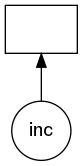

In [9]:
x.visualize()

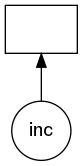

In [10]:
y.visualize()

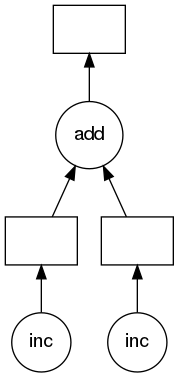

In [11]:
z.visualize()

In [12]:
%%time

z.compute()    #z is a lazy delayed object

CPU times: user 466 ms, sys: 95.4 ms, total: 561 ms
Wall time: 2.65 s


13

In [13]:
z

Delayed('add-5768cb0f-10c4-4905-bd09-c8d2f6aafc6b')

In [14]:
# Parallelizing a for loop

#data = [1, 2, 3, 4, 5, 6, 7, 8]
#import numpy as np
#data = range(0, 100)

In [15]:
%%time
# Sequential code
data = [1, 2, 3, 4, 5, 6, 7, 8]
results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 10.3 s, sys: 132 ms, total: 10.4 s
Wall time: 10.2 s


In [16]:
total

44

In [17]:
%%time
data = range(0, 100)
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

CPU times: user 5.06 ms, sys: 98 µs, total: 5.16 ms
Wall time: 4.24 ms


In [18]:
total

Delayed('sum-b726cff2-4ba1-4a2f-987b-a434e779c45b')

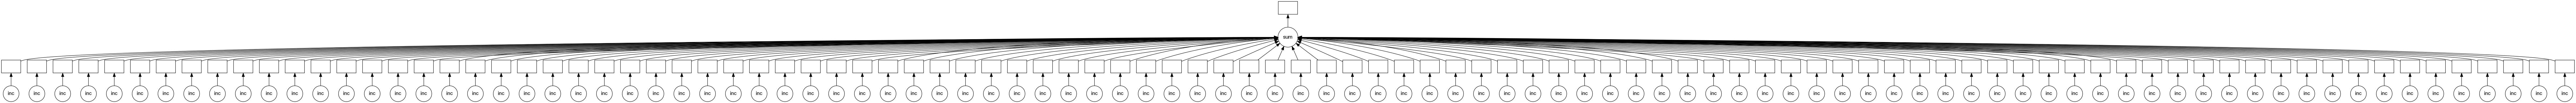

In [19]:
total.visualize()

In [20]:
%%time

total.compute()

CPU times: user 2.98 s, sys: 872 ms, total: 3.85 s
Wall time: 19.3 s


5050

In [21]:
%%time

results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = sum(results)

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 9.63 ms


In [22]:
total

Delayed('add-3d66c48e1de88752b964a1724467ffce')

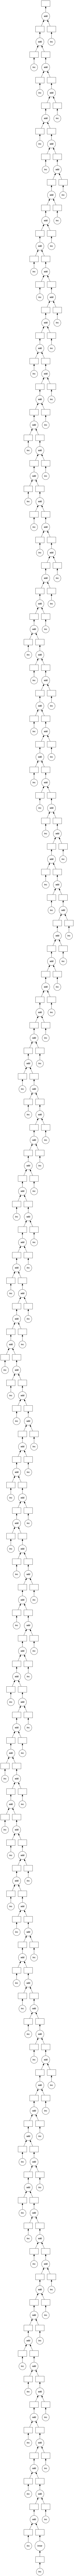

In [23]:
total.visualize()

In [24]:
%%time

total.compute()

CPU times: user 3.27 s, sys: 881 ms, total: 4.15 s
Wall time: 19.9 s


5050

In [25]:
client.close()

2024-03-26 09:57:53,073 - distributed.worker - WARNING - Heartbeat to scheduler failed
Traceback (most recent call last):
  File "/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/comm/tcp.py", line 223, in read
    frames_nbytes = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/worker.py", line 1161, in heartbeat
    response = await retry_operation(
  File "/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/utils_comm.py", line 383, in retry_operation
    return await retry(
  File "/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/utils_comm.py", line 368, in retry
    return await coro()
  File "/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/distributed/c